In [ ]:
from IPython import display

In [ ]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 82 kB 289 kB/s 
     |████████████████████████████████| 15.7 MB 12.1 MB/s 
     |████████████████████████████████| 61 kB 6.9 MB/s 
     |████████████████████████████████| 9.9 MB 18.5 MB/s 
     |████████████████████████████████| 11.2 MB 61.4 MB/s 
     |████████████████████████████████| 944 kB 50.8 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.0.0

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 20.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are 

In [ ]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

from d2l import torch as d2l

d2l.use_svg_display()

##Reading the Dataset

In [ ]:
# USPS : U.S. Postal Service - handwritten text data
trans = transforms.ToTensor()
usps_train = torchvision.datasets.USPS(
    root = "../data", train = True, transform = trans, download = True)
usps_test = torchvision.datasets.USPS(
    root = "../data", train = False, transform = trans, download = True)

  0%|          | 0/6579383 [00:00<?, ?it/s]

  0%|          | 0/1831726 [00:00<?, ?it/s]

In [ ]:
len(usps_train), len(usps_test)

(7291, 2007)

In [ ]:
usps_train[0][0].shape

# (channel = 1 흑백) * (height = 16) * (width = 16)

torch.Size([1, 16, 16])

In [ ]:
def get_usps_labels(labels):
  text_labels =['0','1','2','3','4','5','6','7','8','9']
  return [text_labels[int(i)] for i in labels]

  #output이 10개

In [ ]:
# 데이터 시각화 - 가운데에 잘 위치해 있다.
def show_images(imgs, num_rows, num_cols, titles=None, scale =1.5):
  figsize=(num_cols * scale, num_rows * scale)
  _, axes = d2l.plt.subplots(num_rows, num_cols, figsize = figsize)
  axes = axes.flatten()
  for i, (ax, img) in enumerate(zip(axes, imgs)):
    if torch.is_tensor(img) :
      ax.imshow(img.numpy())
    else :
      ax.imshow(img)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if titles:
      ax.set_title(titles[i])
  return axes

In [ ]:
X, y = next(iter(data.DataLoader(usps_train, batch_size=18)))


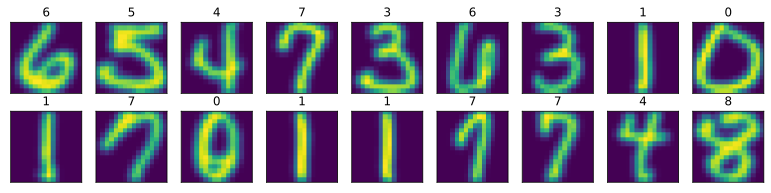

In [ ]:
show_images(X.reshape(18,16,16), 2,9, titles=get_usps_labels(y));

## Reading a Minibatch

In [ ]:
batch_size = 256

def get_dataloader_workers():
  return 4

train_iter = data.DataLoader(usps_train, batch_size, shuffle=True, num_workers=get_dataloader_workers())

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
timer = d2l.Timer()
for X,y in train_iter:
  continue
f'{timer.stop() : .2f} sec'

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


' 0.59 sec'

In [ ]:
def load_data_usps(batch_size, resize=None):
  trans = [transforms.ToTensor()]   # 데이터를 텐서로 바꿔줌
  if resize:
    trans.insert(0, transforms.Resize(resize))
  trans = transforms.Compose(trans)
  usps_train = torchvision.datasets.USPS(
    root = "../data", train = True, transform = trans, download = True)
  usps_test = torchvision.datasets.USPS(
    root = "../data", train = False, transform = trans, download = True)
  return (data.DataLoader(usps_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()),
          data.DataLoader(usps_test, batch_size, shuffle=False, num_workers=get_dataloader_workers()))

In [ ]:
train_iter, test_iter = load_data_usps(32, resize=64)
for X,y in train_iter:
  print(X.shape, X.dtype, y.shape, y.dtype)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


In [ ]:
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = load_data_usps(batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


## Initializing Model Parameters

In [ ]:
# input = 16*16
# output = 10
# weights = 256*10
# bias = 1*10

num_inputs = 256
num_outputs = 10

W = torch.normal(0,0.01, size = (num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad= True)

## Defining the Softmax Operation

In [ ]:
def softmax(X):
  X_exp = torch.exp(X)
  partition = X_exp.sum(1, keepdim = True)
  return X_exp / partition

In [ ]:
X = torch.normal(0,1,(2,5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.0169, 0.0473, 0.0530, 0.8334, 0.0494],
         [0.3403, 0.1883, 0.0849, 0.2884, 0.0980]]), tensor([1., 1.]))

## Defining the Model

In [ ]:
def net(X):
  return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W)+b)

## Defining the Loss Function

In [ ]:
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = torch.tensor([0,2])
y_hat[[0,1], y]

tensor([0.1000, 0.5000])

In [ ]:
def cross_entropy(y_hat, y):
  return - torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [ ]:
y_hat.type(y.dtype)

tensor([[0, 0, 0],
        [0, 0, 0]])

##Classification Accuracy

In [ ]:
def accuracy(y_hat, y):
  if len(y_hat.shape) >1 and y_hat.shape[1] > 1:
    y_hat = y_hat.argmax(axis=1)
  cmp = y_hat.type(y.dtype)==y
  return float(cmp.type(y.dtype).sum())

In [ ]:
accuracy(y_hat, y) / len(y)
# 성능이 잘 나오지는 않는다.

0.5

In [ ]:
def evaluate_accuracy(net, data_iter):
  if isinstance(net, torch.nn.Module):
    net.eval()
  metric = Accumulator(2)

  with torch.no_grad():
    for X,y in data_iter:
      metric.add(accuracy(net(X), y), y.numel())
  return metric[0] / metric[1]

In [ ]:
# Accumulator : utility class to accumulate sums over multiple variables 
# 여러가지 변수를 업데이트하고 그 변수들을 저장하는 class
class Accumulator:
  def __init__(self, n):
    self.data = [0,0] * n

  def add(self, *args):
    self.data = [a+float(b) for a, b in zip(self.data, args)]
  
  def reset(self):
    self.data = [0,0] * len(self.data)

  def __getitem__(self, idx):
    return self.data[idx]

In [ ]:
evaluate_accuracy(net, test_iter)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.07922272047832586

## Trainig

In [ ]:
def train_epoch_ch3(net, train_iter, loss, updater):
  if isinstance(net, torch.nn.Module):
    net.train()
  metric = Accumulator(3)

  for X, y in train_iter:
    y_hat = net(X)
    l = loss(y_hat, y)
    if isinstance(updater, torch.optim.Optimizer):
      updater.zero_grad()  #training에서는 gradient 연산 진행
      l.mean().backward()
      updater.step()
    else :
      l.sum().backward()
      updater(X.shape[0])
    metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
  return metric[0] / metric[2], metric[1] / metric[2]

In [ ]:
class Animator:
  def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear',
               fmts=('-','m--','g-.','r:'), nrows=1, ncols=1, figsize=(3.5, 2.5)):
    if legend is None:
      legend=[]
    d2l.use_svg_display()
    self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
    if nrows * ncols == 1:
      self.axes = [self.axes, ]
    self.config_axes = lambda: d2l.set_axes(
        self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
    self.X, self.Y, self.fmts = None, None, fmts

  def add(self, x, y):
    if not hasattr(y, "__len__"):
      y=[y]
    n=len(y)
    if not hasattr(x, "__len__"):
      x=[x]*n
    if not self.X:
      self.X = [[] for _ in range(n)]
    if not self.Y:
      self.Y = [[] for _ in range(n)]
    for i, (a,b) in enumerate(zip(x,y)):
      if a is not None and b is not None:
        self.X[i].append(a)
        self.Y[i].append(b)
    self.axes[0].cla()
    for x,y,fmt in zip(self.X, self.Y, self.fmts):
      self.axes[0].plot(x, y, fmt)
    self.config_axes()
    display.display(self.fig)
    display.clear_output(wait=True)


In [ ]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater): 
  animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                      legend=['train loss', 'train acc', 'test acc'])
  for epoch in range(num_epochs):
    train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
    test_acc = evaluate_accuracy(net, test_iter)
    animator.add(epoch + 1, train_metrics + (test_acc,))
  train_loss, train_acc = train_metrics
  assert train_loss < 0.5, train_loss
  assert train_acc <= 1 and train_acc > 0.7, train_acc
  assert test_acc <= 1 and test_acc > 0.7, test_acc

In [ ]:
lr=0.1

def updater(batch_size):
  return d2l.sgd([W,b], lr, batch_size)

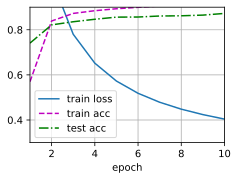

In [ ]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

## Prediction

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


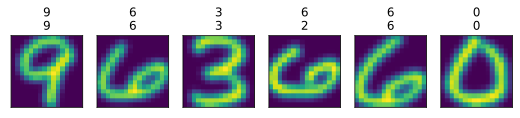

In [ ]:
# prediction이라서 따로 gradient 연산 없다
# 예측을 어느정도는 잘 하는 것으로 보인다
def predict_ch3(net, test_iter, n=6):
  for X,y in test_iter:
    break
  trues = get_usps_labels(y)
  preds = get_usps_labels(net(X).argmax(axis=1))
  titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
  d2l.show_images(
      X[0:n].reshape((n, 16, 16)),1,n,titles=titles[0:n])
  
predict_ch3(net, test_iter)

## Concise Implementation of Softmax Regression


In [ ]:
from torch import nn
batch_size = 256 
train_iter, test_iter = loead_data_usps(batch_size)

In [ ]:
net = nn.Sequential(nn.Flatten(), nn.Linear(256, 10))

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std = 0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
loss = nn.CrossEntropyLoss(reduction='none')

In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

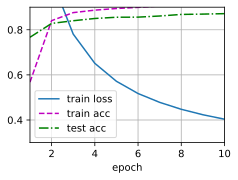

In [ ]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)